In [12]:
import pandas as pd

2.2.2


We will first read the csv file titled RAW_recipes.

In [13]:
RAW_recipes=pd.read_csv('RAW_recipes.csv')

In [14]:
RAW_recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


We want to see how an entry of "tags" column of this file looks like.

In [113]:
RAW_recipes['tags'][0]

['60-minutes-or-less',
 'time-to-make',
 'course',
 'main-ingredient',
 'cuisine',
 'preparation',
 'occasion',
 'north-american',
 'side-dishes',
 'vegetables',
 'mexican',
 'easy',
 'fall',
 'holiday-event',
 'vegetarian',
 'winter',
 'dietary',
 'christmas',
 'seasonal',
 'squash']

We will write a function that turns a string to a list. We will use this function to turn some string entries of the columns RAW_recipes into lists. 

In [17]:
import ast

def convert_to_list(tags_str):
    try:
        return ast.literal_eval(tags_str)
    except (ValueError, SyntaxError):
        return []

We will write a function that will help us to read the "tags" column of RAW_recipes and look for certain time related keywords.

In [18]:
def extract_time_tags(tags):
    time_related_tags = []
    for tag in tags:
        if 'minute' in tag or 'days' in tag or 'hour' in tag or 'day-or-more' in tag:
            time_related_tags.append(tag)
    return time_related_tags

Now we will apply the two functions we created to "tags" column of RAW_recipes.

In [ ]:
# Apply the conversion function to the 'tags' column
RAW_recipes['tags'] = RAW_recipes['tags'].apply(convert_to_list)

# Create a new column in with the extracted time-related tags
RAW_recipes['Time_Tags'] = RAW_recipes['tags'].apply(extract_time_tags)

In [19]:
# Check the first 10 rows to verify
for i in range(100):
    print(RAW_recipes['Time_Tags'][i])

# Count the number of rows with at least one time-related tag
num_time_related = RAW_recipes['Time_Tags'].apply(lambda x: len(x) > 0).sum()

print(f"Number of rows with at least one time-related tag: {num_time_related}")

['60-minutes-or-less']
['30-minutes-or-less']
['4-hours-or-less']
['60-minutes-or-less']
['4-hours-or-less']
['15-minutes-or-less']
['15-minutes-or-less']
['4-hours-or-less']
['4-hours-or-less']
['4-hours-or-less']
['15-minutes-or-less']
['1-day-or-more']
['1-day-or-more']
[]
['15-minutes-or-less']
[]
['60-minutes-or-less']
['15-minutes-or-less']
['4-hours-or-less']
['4-hours-or-less']
['60-minutes-or-less']
['60-minutes-or-less']
['60-minutes-or-less']
['30-minutes-or-less']
['30-minutes-or-less']
['15-minutes-or-less']
['60-minutes-or-less']
[]
['60-minutes-or-less']
['4-hours-or-less']
['4-hours-or-less']
['60-minutes-or-less']
['15-minutes-or-less']
['30-minutes-or-less']
['15-minutes-or-less']
['15-minutes-or-less']
['60-minutes-or-less']
['30-minutes-or-less']
['30-minutes-or-less']
['60-minutes-or-less']
['30-minutes-or-less']
['60-minutes-or-less']
['60-minutes-or-less']
['60-minutes-or-less']
['30-minutes-or-less']
['15-minutes-or-less']
['60-minutes-or-less']
['4-hours-or-les

We will count how many times each entry of "Time_Tags" column is repeated.

In [20]:
time_category_counts = RAW_recipes['Time_Tags'].value_counts()

print(time_category_counts)

Time_Tags
[60-minutes-or-less]                        69884
[30-minutes-or-less]                        54996
[4-hours-or-less]                           49401
[15-minutes-or-less]                        43848
[]                                          11196
[1-day-or-more]                              2117
[60-minutes-or-less, 4-hours-or-less]          51
[30-minutes-or-less, 15-minutes-or-less]       41
[60-minutes-or-less, 15-minutes-or-less]       26
[60-minutes-or-less, 30-minutes-or-less]       26
[15-minutes-or-less, 4-hours-or-less]          18
[1-day-or-more, 4-hours-or-less]               15
[30-minutes-or-less, 4-hours-or-less]          12
[60-minutes-or-less, 1-day-or-more]             3
[30-minutes-or-less, 1-day-or-more]             2
[15-minutes-or-less, 1-day-or-more]             1
Name: count, dtype: int64


We will find the indices of the recipes which does not have a time tag we looked for or the ones which have more than one time tag.

In [116]:
# Get the indices of rows that do not have any time-related tags
indices_no_time_tags = RAW_recipes[RAW_recipes['Time_Tags'].apply(lambda x: len(x) != 1)].index

Now we will clean these from RAW_recipes and create RAW_recipes_time_cleaned. By this way we will get the recipes which has only the time-tags we looked for.

In [117]:
# Drop the rows with no time-related tags
RAW_recipes_time_cleaned = RAW_recipes.drop(indices_no_time_tags).reset_index(drop=True)

In [118]:
RAW_recipes_time_cleaned.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,Time_Tags,Cusine_Tags
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"[60-minutes-or-less, time-to-make, course, mai...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,[60-minutes-or-less],[mexican]
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"[30-minutes-or-less, time-to-make, course, mai...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,[30-minutes-or-less],[northeastern-united-states]
2,all in the kitchen chili,112140,130,196586,2005-02-25,"[time-to-make, course, preparation, main-dish,...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,[4-hours-or-less],[]
3,alouette potatoes,59389,45,68585,2003-04-14,"[60-minutes-or-less, time-to-make, course, mai...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,[60-minutes-or-less],[]
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"[weeknight, time-to-make, course, main-ingredi...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,[4-hours-or-less],[northeastern-united-states]


Next we will observe how may recipes we have here with each time tag we searched for after cleaning.

In [26]:
# Count the occurrences of each category in the Time_Category column
time_category_counts = RAW_recipes_time_cleaned['Time_Tags'].value_counts()

# Print the counts of all categories for reference
print(time_category_counts)

Time_Tags
[60-minutes-or-less]    69884
[30-minutes-or-less]    54996
[4-hours-or-less]       49401
[15-minutes-or-less]    43848
[1-day-or-more]          2117
Name: count, dtype: int64


In [28]:
# Count the occurrences of each category in the Time_Category column
num_ingredients_category_counts = RAW_recipes_cleaned['n_ingredients'].value_counts()

# Print the counts of all categories for reference
print(num_ingredients_category_counts)

n_ingredients
8     24389
9     23462
7     23456
10    21312
6     20877
11    18090
5     17362
12    14377
4     12165
13    11011
14     7789
3      6548
15     5616
16     3920
17     2599
2      2018
18     1791
19     1170
20      800
21      492
22      313
23      219
24      153
25       95
26       56
27       49
28       30
1        23
29       19
30       17
31       11
33        4
32        3
35        2
37        2
34        2
38        1
43        1
36        1
40        1
Name: count, dtype: int64


In [29]:
## code here
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [30]:
RAW_recipes_cleaned['Time_Tags'] = RAW_recipes_cleaned['Time_Tags'].apply(lambda x: ' '.join(x))

In [31]:
RAW_recipes_cleaned.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,Time_Tags
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"[60-minutes-or-less, time-to-make, course, mai...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,60-minutes-or-less
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"[30-minutes-or-less, time-to-make, course, mai...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,30-minutes-or-less
2,all in the kitchen chili,112140,130,196586,2005-02-25,"[time-to-make, course, preparation, main-dish,...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,4-hours-or-less
3,alouette potatoes,59389,45,68585,2003-04-14,"[60-minutes-or-less, time-to-make, course, mai...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,60-minutes-or-less
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"[weeknight, time-to-make, course, main-ingredi...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,4-hours-or-less


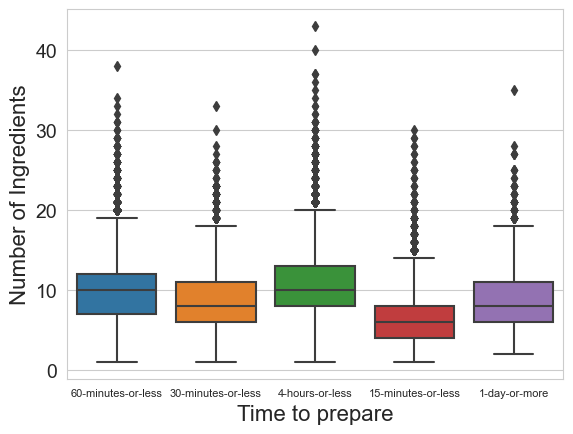

In [33]:
## code here
sns.boxplot(data=RAW_recipes_cleaned,
               y = 'n_ingredients',
               x = 'Time_Tags')

plt.ylabel("Number of Ingredients", fontsize=16)
plt.yticks(fontsize=14)

plt.xlabel("Time to prepare", fontsize=16)
plt.xticks(fontsize=8)

plt.show()

In [99]:
world_cuisines = [
    'italian',
    'japanese',
    'greek',
    'portuguese',
    'chinese',
    'indonesian',
    'mexican',
    'french',
    'spanish',
    'peruvian',
    'indian',
    'brazilian',
    'polish',
    'argentinian',
    'turkish',
    'states',
    'thai',
    'korean',
    'croatian',
    'serbian',
    'hungarian',
    'vietnamese',
    'iranian',
    'chilean',
    'lebanese',
    'georgian',
    'bosnian',
    'colombian',
    'romanian',
    'bulgarian',
    'malaysian',
    'german',
    'filipino',
    'belgian',
    'czech',
    'austrian',
    'swiss',
    'lithuanian',
    'english',
    'algerian',
    'russian',
    'slovak',
    'canadian',
    'swedish',
    'dutch',
    'moroccan',
    'scottish',
    'ecuadorian',
    'danish',
    'australian',
    'egyptian',
    'south-african',
    'ukrainian',
    'syrian',
    'irish',
    'singaporean',
    'pakistani',
    'puerto',
    'norwegian',
    'bolivian',
    'macedonian',
    'israeli',
    'palestinian',
    'slovenian',
    'finnish',
    'tunisian',
    'haitian',
    'jamaican',
    'armenian',
    'venezuelan',
    'belarusian',
    'moldovan',
    'lankan',
    'jordanian',
    'cuban',
    'uzbekistani',
    'azerbaijani',
    'taiwanese',
    'uruguayan',
    'montenegrin',
    'ethiopian',
    'iraqi',
    'qatari',
    'trinidadian',
    'libyan',
    'lao',
    'barbadian',
    'cypriot',
    'bengali',
    'kazakhstani',
    'albanian',
    'kyrgyzstani',
    'burmese',
    'zealand',
    'saudi',
    'irish',
    'bahamian',
    'dominican',
    'welsh',
    'ghanaian'
]

In [101]:
# Define a function to extract tags containing 'minutes', 'hours', or 'days'
def extract_cusine_tags(tags):
    time_related_tags = []
    for tag in tags:
        for cuisine in world_cuisines:
            if cuisine in tag:
                time_related_tags.append(tag)
    return time_related_tags

# Create a new column in the DataFrame with the extracted time-related tags
RAW_recipes['Cusine_Tags'] = RAW_recipes['tags'].apply(extract_cusine_tags)

In [108]:
# Count the occurrences of each category in the Time_Category column
cusine_category_counts = RAW_recipes['Cusine_Tags'].value_counts()

# Print the counts of all categories for reference
print(cusine_category_counts)

Cusine_Tags
[]                                                                            176104
[italian]                                                                       6911
[southern-united-states]                                                        6277
[mexican]                                                                       5642
[canadian]                                                                      3923
                                                                               ...  
[canadian, french, southern-united-states, russian]                                1
[brazilian, mexican, peruvian, venezuelan]                                         1
[southern-united-states, irish, irish, polish, northeastern-united-states]         1
[southwestern-united-states, moroccan]                                             1
[greek, moroccan]                                                                  1
Name: count, Length: 667, dtype: int64


In [110]:
# Get the indices of rows that do not have any time-related tags
indices_no_time_tags = RAW_recipes[RAW_recipes['Cusine_Tags'].apply(lambda x: len(x) > 1)].index

# Drop the rows with no time-related tags
RAW_recipes_cleaned = RAW_recipes.drop(indices_no_time_tags).reset_index(drop=True)

In [111]:
# Count the occurrences of each category in the Time_Category column
cusine_category_counts = RAW_recipes_cleaned['Cusine_Tags'].value_counts()

# Print the counts of all categories for reference
print(cusine_category_counts)

Cusine_Tags
[]                              176104
[italian]                         6911
[southern-united-states]          6277
[mexican]                         5642
[canadian]                        3923
[indian]                          2564
[australian]                      2355
[southwestern-united-states]      2194
[greek]                           2165
[chinese]                         1841
[french]                          1813
[northeastern-united-states]      1724
[german]                          1186
[english]                         1173
[thai]                            1116
[spanish]                          871
[moroccan]                         839
[japanese]                         768
[new-zealand]                      405
[scottish]                         381
[swedish]                          340
[russian]                          322
[vietnamese]                       314
[south-african]                    313
[swiss]                            302
[polish]     

In [112]:
len(cusine_category_counts)

60

In [105]:
# Write the Series to a text file
cusine_category_counts.to_csv('output.txt', sep='\t', header=False)

In [89]:
RAW_recipes_cleaned3 = RAW_recipes[RAW_recipes['n_ingredients'] <= 30].reset_index(drop=True)

In [90]:
RAW_recipes_cleaned2 = RAW_recipes_cleaned3[RAW_recipes_cleaned3['minutes'] <= 60].reset_index(drop=True)

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

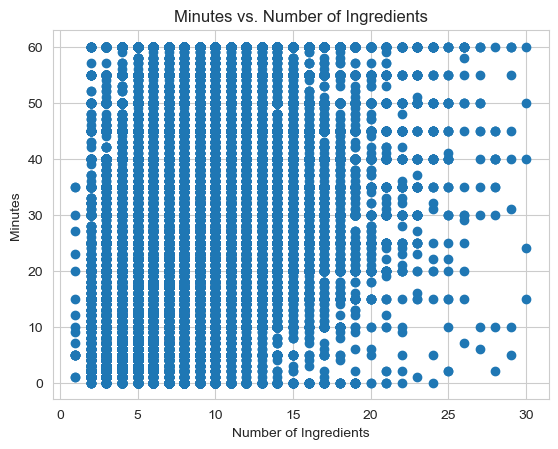

In [92]:
Minutes=RAW_recipes_cleaned2['minutes']
N_ingredients=RAW_recipes_cleaned2['n_ingredients']
plt.scatter(N_ingredients, Minutes)
plt.title('Minutes vs. Number of Ingredients')
plt.ylabel('Minutes')
plt.xlabel('Number of Ingredients')
plt.show()

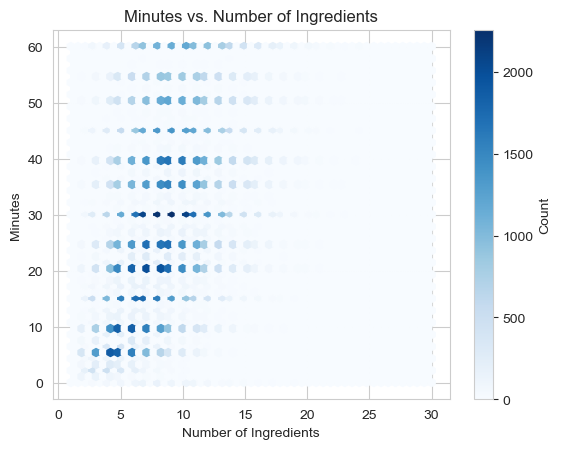

In [93]:
# Assuming RAW_recipes_cleaned2 is your DataFrame
Minutes = RAW_recipes_cleaned2['minutes']
N_ingredients = RAW_recipes_cleaned2['n_ingredients']

plt.hexbin(N_ingredients, Minutes, gridsize=50, cmap='Blues')
plt.colorbar(label='Count')
plt.title('Minutes vs. Number of Ingredients')
plt.ylabel('Minutes')
plt.xlabel('Number of Ingredients')
plt.show()

In [94]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming RAW_recipes_cleaned2 is your DataFrame
Minutes = RAW_recipes_cleaned2['minutes']
N_ingredients = RAW_recipes_cleaned2['n_ingredients']

# Combine the data into a single array of (x, y) points
points = np.array(list(zip(N_ingredients, Minutes)))

# Get unique points and their counts
unique_points, counts = np.unique(points, axis=0, return_counts=True)

# Extract the unique x and y values
unique_N_ingredients = unique_points[:, 0]
unique_Minutes = unique_points[:, 1]


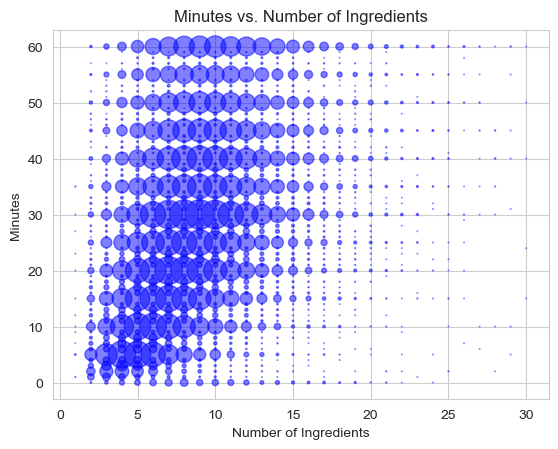

In [98]:
# Define sizes based on counts
sizes = counts/5  # Adjust the multiplier as needed

plt.scatter(unique_N_ingredients, unique_Minutes, s=sizes, c='blue', alpha=0.5)
plt.title('Minutes vs. Number of Ingredients')
plt.ylabel('Minutes')
plt.xlabel('Number of Ingredients')
plt.show()

In [64]:
counts

array([2, 6, 1, ..., 1, 1, 1], dtype=int64)